# Particle Visualization in HGCAL detectors

In [1]:
#Importing the necessary libraries
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import awkward as ak

In [2]:
!pwd

/Users/priyankar/Desktop/MSc_Project_HEP


In [3]:
#Opening the root file
file=uproot.open("/Users/priyankar/Desktop/MSc_Project_HEP/ntuple_pi+_100GeV_100keve.root:AllLayers")

In [4]:
file.keys()

['event_n',
 'hit_E',
 'hit_x',
 'hit_y',
 'hit_z',
 'hit_l',
 'EElayer_1_totE',
 'EElayer_2_totE',
 'EElayer_3_totE',
 'EElayer_4_totE',
 'EElayer_5_totE',
 'EElayer_6_totE',
 'EElayer_7_totE',
 'EElayer_8_totE',
 'EElayer_9_totE',
 'EElayer_10_totE',
 'EElayer_11_totE',
 'EElayer_12_totE',
 'EElayer_13_totE',
 'EElayer_14_totE',
 'EElayer_15_totE',
 'EElayer_16_totE',
 'EElayer_17_totE',
 'EElayer_18_totE',
 'EElayer_19_totE',
 'EElayer_20_totE',
 'EElayer_21_totE',
 'EElayer_22_totE',
 'EElayer_23_totE',
 'EElayer_24_totE',
 'EElayer_25_totE',
 'EElayer_26_totE',
 'EElayer_27_totE',
 'EElayer_28_totE',
 'HElayer_29_totE',
 'HElayer_30_totE',
 'HElayer_31_totE',
 'HElayer_32_totE',
 'HElayer_33_totE',
 'HElayer_34_totE',
 'HElayer_35_totE',
 'HElayer_36_totE',
 'HElayer_37_totE',
 'HElayer_38_totE',
 'HElayer_39_totE',
 'HElayer_40_totE']

In [5]:
file["hit_E"].array(library="ak")

<Array [[9.53e-05, 8.14e-05, ..., 0.000217], ...] type='100000 * var * float64'>

In [6]:
#file["hit_x"].array(library="ak")
l=file["hit_l"].array(library="ak")
x=file["hit_x"].array(library="ak")
y=file["hit_y"].array(library="ak")
z=file["hit_z"].array(library="ak")
E=file["hit_E"].array(library="ak")

In [7]:
l # Layer index of the hit
# Two times 6 means there are two hits in the 6th index layer

<Array [[1, 2, 3, 4, 5, ..., 38, 38, 38, 39], ...] type='100000 * var * int32'>

In [8]:
l[0]

<Array [1, 2, 3, 4, 5, 6, 6, ..., 37, 37, 38, 38, 38, 39] type='404 * int32'>

In [9]:
z

<Array [[13.9, 14.8, 16.8, ..., 138, 145], ...] type='100000 * var * float64'>

In [10]:
#z[0]
z[:,1]

<Array [14.8, 14.8, 14.8, 14.8, ..., 13.9, 14.8, 14.8] type='100000 * float64'>

In [11]:
E

<Array [[9.53e-05, 8.14e-05, ..., 0.000217], ...] type='100000 * var * float64'>

In [12]:
E[0]

<Array [9.53e-05, 8.14e-05, ..., 0.000768, 0.000217] type='404 * float64'>

In [13]:
ak.mean(E[:,0])
#ak.sum(E[:,0])/100000

0.00031040013311300847

In [14]:
#E[:,132]

In [15]:
l

<Array [[1, 2, 3, 4, 5, ..., 38, 38, 38, 39], ...] type='100000 * var * int32'>

## Plotting the Longitudinal profile

### Finding the mean Energy data

In [16]:
#Locating the Energy deposit for layer-1 in all the events
mask=(l==1)
E1=E[mask]
E1

<Array [[9.53e-05], [8.74e-05], ..., [9.06e-05]] type='100000 * var * float64'>

In [17]:
np.mean(ak.sum(E1, axis=1))

0.0005806129095458032

In [18]:
E_ar=[]
E_mean=[]
for i in range(50):
    mask=(l==i)
    #E_ar.append(E[mask])
    E_mean.append(np.mean(ak.sum(E[mask],axis=1)))
E_mean

[0.0,
 0.0005806129095458032,
 0.0009666423197758842,
 0.0015977030413518215,
 0.002321056514416862,
 0.0034623099859760406,
 0.0042977767475696265,
 0.005714044282561089,
 0.006338770735673681,
 0.007797346406083678,
 0.008015512023166351,
 0.00940298395717573,
 0.009238148940020162,
 0.010430587217696347,
 0.009934768548978871,
 0.010969590217047435,
 0.01024272836849524,
 0.011143470133670605,
 0.01027458739320665,
 0.011088524081770225,
 0.010179683034315896,
 0.010049671058826131,
 0.009373630157006268,
 0.009661688141135459,
 0.009080533998838836,
 0.010151464665094671,
 0.009330919361937473,
 0.009929120674612773,
 0.008760465306420372,
 0.007699755461200792,
 0.008569562491402763,
 0.00864499073522438,
 0.008306084558972499,
 0.007294266553117592,
 0.006728292634210984,
 0.005292642621622894,
 0.004694692665408654,
 0.004353894838955105,
 0.0024164676866435986,
 0.001862983527782387,
 0.0015337920979661397,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [19]:
E_mean=np.array(E_mean)

In [20]:
E_mean.shape

(50,)

In [21]:
z

<Array [[13.9, 14.8, 16.8, ..., 138, 145], ...] type='100000 * var * float64'>

In [22]:
mask=(l==2)
z1=z[mask]
z1

<Array [[14.8], [14.8], ..., [14.8], [14.8]] type='100000 * var * float64'>

In [23]:
d=(ak.mean(z1, axis=1))
d[0]

14.752499999999998

In [24]:
#E_ar=[]
z_d=[]
for i in range(50):
    mask=(l==i)
#    #E_ar.append(E[mask])
    z_d.append((ak.mean(z[mask],axis=1))[0])
z_d

[nan,
 13.8625,
 14.752499999999998,
 16.767500000000002,
 17.657500000000002,
 19.672500000000003,
 20.562500000000004,
 22.677500000000006,
 23.567500000000006,
 25.682500000000005,
 26.572500000000005,
 28.6875,
 29.5775,
 31.492499999999996,
 32.38249999999999,
 34.29749999999999,
 35.18749999999999,
 37.102499999999985,
 37.992499999999986,
 39.907499999999985,
 40.797499999999985,
 42.892499999999984,
 44.02249999999998,
 46.39749999999998,
 47.52749999999998,
 49.667,
 50.672999999999995,
 52.86649999999998,
 53.88850000000001,
 64.60350000000004,
 71.31100000000002,
 78.01849999999999,
 84.82600000000001,
 91.53349999999999,
 98.22099999999999,
 115.1385,
 122.54599999999996,
 129.9534999999999,
 137.78099999999992,
 145.18849999999992,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

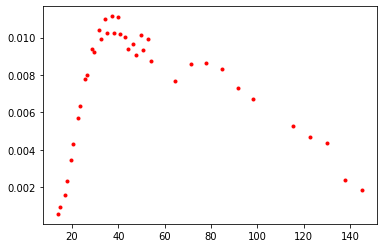

In [25]:
#Plotting z vs E
plt.plot(z_d,E_mean,'r.')

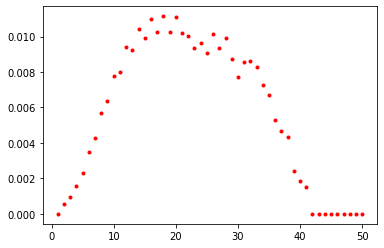

In [26]:
#Plotting l vs E
l_dat=np.linspace(1,50,50)
#l_dat.shape
plt.plot(l_dat,E_mean,'r.')

## Plotting the lateral energy profile

For the lateral energy profile, we need the distribution of the energy with the radial distance from centre.
Lets at first, visualize the x and y data

In [27]:
x

<Array [[0, 0, 0, ..., 3.88, -3.88, 5.82], ...] type='100000 * var * float64'>

In [28]:
y

<Array [[0, 0, 0, ..., 3.36, -3.36, 1.12], ...] type='100000 * var * float64'>

In [29]:
r=np.sqrt(x**2+y**2)

In [30]:
r

<Array [[0, 0, 0, 0, ..., 5.13, 5.13, 5.93], ...] type='100000 * var * float64'>

In [31]:
mask=(l==1)
r1=r[mask]
r1

<Array [[0], [0], [0], ..., [0, ...], [0], [0]] type='100000 * var * float64'>

In [32]:
np.mean(ak.sum(r1, axis=1))

1.5685573894339238

In [33]:
r_ar=[]
r_mean=[]
for i in range(50):
    mask=(l==i)
    #E_ar.append(E[mask])
    r_mean.append(np.mean(ak.sum(r[mask],axis=1)))
r_mean

[0.0,
 1.5685573894339238,
 2.445641794820658,
 4.188022559463577,
 5.699082447438985,
 8.682949251569314,
 10.742169763099374,
 14.774893275317128,
 16.807222319227982,
 21.587446843388086,
 23.21675718724405,
 28.338990833421096,
 28.659293120997674,
 33.77306908696413,
 33.28586818152457,
 38.303109104622266,
 37.08489275160625,
 41.84331480577617,
 39.926794455342375,
 44.37686398363184,
 41.75019771301725,
 47.54371481211825,
 43.7873852556291,
 49.31618803216548,
 45.09187912925491,
 47.92500294523203,
 44.63487541485392,
 47.56598931358791,
 42.177111232148434,
 115.81587461181249,
 125.04788555814713,
 135.81895458639033,
 134.65953670056547,
 125.72699609623395,
 116.6477957166124,
 122.20229333153172,
 103.48815537666448,
 85.5295458501109,
 24.139351499723787,
 20.13874172808456,
 16.59421726791369,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

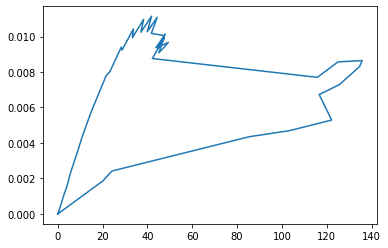

In [34]:
plt.plot(r_mean,E_mean)

## Lateral profile

In [35]:
# Reading the index file
columns=["index","x","y","z","l"]
s=pd.read_csv("cellIndex.txt",sep=" ",usecols=columns)
s.head(133)

,index,x,y,z,l
0,0,0.00000,0.00,13.8625,1
1,1,0.00000,1.12,13.8625,1
2,2,0.00000,-1.12,13.8625,1
3,3,0.00000,2.24,13.8625,1
4,4,0.00000,-2.24,13.8625,1
...,...,...,...,...,...
128,128,-5.81969,-2.24,13.8625,1
129,129,6.78964,0.56,13.8625,1
130,130,6.78964,-0.56,13.8625,1
131,131,-6.78964,0.56,13.8625,1


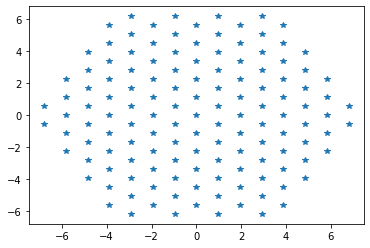

In [36]:
plt.plot(s["x"][:133],s["y"][:133],"*")
plt.show()

In [37]:
#x=s['x'][:133].to_numpy
#y=s['y'][:133].to_numpy

In [38]:
s['r']=np.sqrt((s['x']-0)**2+(s['y']-0)**2)
s['r'][:133]

0      0.000000
1      1.120000
2      1.120000
3      2.240000
4      2.240000
         ...   
128    6.235895
129    6.812695
130    6.812695
131    6.812695
132    6.812695
Name: r, Length: 133, dtype: float64

In [39]:
np.unique(s["r"][:133].values)

array([0.        , 1.11999961, 1.12      , 1.93989668, 1.9399    ,
       2.24      , 2.24000268, 2.96324132, 2.96324349, 2.96324603,
       3.36      , 3.36000402, 3.87979   , 3.87979536, 4.03821377,
       4.03821732, 4.03822077, 4.4799967 , 4.48      , 4.88196457,
       4.88196805, 4.88196958, 5.1324819 , 5.13248264, 5.13248469,
       5.59999804, 5.6       , 5.81969   , 5.81969304, 5.92648044,
       5.92648224, 5.92648395, 6.23589433, 6.23589542, 6.23589602,
       6.81269186, 6.81269487, 6.81269602])

In [40]:
E

<Array [[9.53e-05, 8.14e-05, ..., 0.000217], ...] type='100000 * var * float64'>

In [41]:
E[0]

<Array [9.53e-05, 8.14e-05, ..., 0.000768, 0.000217] type='404 * float64'>

In [42]:
x

<Array [[0, 0, 0, ..., 3.88, -3.88, 5.82], ...] type='100000 * var * float64'>

In [43]:
y

<Array [[0, 0, 0, ..., 3.36, -3.36, 1.12], ...] type='100000 * var * float64'>

In [44]:
r=np.sqrt(x**2+y**2)

In [45]:
r

<Array [[0, 0, 0, 0, ..., 5.13, 5.13, 5.93], ...] type='100000 * var * float64'>

In [46]:
r[0]

<Array [0, 0, 0, 0, 0, ..., 8.84, 4.04, 5.13, 5.13, 5.93] type='404 * float64'>

In [47]:
l[0]

<Array [1, 2, 3, 4, 5, 6, 6, ..., 37, 37, 38, 38, 38, 39] type='404 * int32'>

In [52]:
#rad_E =[]
#for i in range(0,10,1):
#    a = plt.hist(r[i], bins = 1000, range=(-0.5,7.5),weights=E[i])
#    rad_E.append(a[0])

In [75]:
#define binning
bins=np.linspace(0,7.5,300)
bin_centers=0.5*(bins[:-1]+bins[1:])

In [76]:
#assign each hit to a bin
bin_indices=np.digitize(ak.to_numpy(ak.flatten(r)),bins)-1

In [100]:
bin_indices.shape

(50905593,)

In [87]:
#Compute per event histogram using broadcasting
def per_event_histogram(r_event,E_event):
    #compute histogram for one event
    h,_= np.histogram(r_event,bins=bins,weights=E_event)
    return h

In [88]:
rad_E_per_event=ak.Array([per_event_histogram(ri,Ei) for ri,Ei in zip(r,E)])

In [89]:
rad_E_mean=np.mean(rad_E_per_event,axis=0)

In [98]:
rad_E_per_event

<Array [[0.066, 0, 0, ..., 0.000862, 0, 0], ...] type='100000 * var * float64'>

In [91]:
rad_E_mean

<Array [0.0737, 0, 0, 0, 0, 0, ..., 0, 0, 0.000759, 0, 0] type='299 * float64'>

In [84]:
bin_centers.shape

(299,)

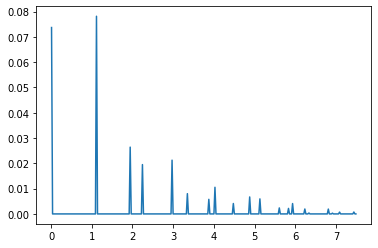

In [92]:
plt.plot(bin_centers,rad_E_mean)

In [102]:
# A trial
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

# --- Define bins ---
#bins = np.linspace(0, 7.5, 300)
#bin_centers = 0.5 * (bins[:-1] + bins[1:])

# --- Digitize r for each event (broadcast-safe, no flatten) ---
# use vectorized comparison to find bin index
# this mimics np.digitize but keeps event structure
def digitize_awkward(x, bins):
    # For each hit, find which bin it belongs to
    return ak.sum(x[..., None] >= bins, axis=-1) - 1

bin_indices = digitize_awkward(r, bins)

# --- Mask out-of-range hits ---
mask = (bin_indices >= 0) & (bin_indices < len(bins) - 1)
bin_indices = bin_indices[mask]
E_masked = E[mask]

# --- Compute per-event histograms (vectorized, no flatten) ---
rad_E_per_event = ak.bincount(
    bin_indices,
    weight=E_masked,
    minlength=len(bins) - 1,
    axis=1
)

# --- Average across events ---
rad_E_mean = ak.mean(rad_E_per_event, axis=0)

# --- Plot ---
plt.plot(bin_centers, rad_E_mean, lw=2)
plt.xlabel("Radial distance r")
plt.ylabel("⟨Energy deposited⟩ per event")
plt.title("Average Lateral Shower Profile for Pions")
plt.grid(True)
plt.show()



ValueError: cannot broadcast RegularArray of size 300 with RegularArray of size 100000 in greater_equal

This error occurred while calling

    numpy.greater_equal.__call__(
        <Array [[[0], [0], ..., [5.93]], ...] type='100000 * var * 1 * float64'>
        numpy.ndarray([0.         0.02508361 0.05016722 ...
    )

In [103]:
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

# --- Define bins ---
bins = np.linspace(0, 7.5, 300)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# --- Digitize each event’s hits safely ---
def digitize_awkward(x, bins):
    # make bins an awkward array with a length-1 outer axis
    bins_ak = ak.Array([bins])
    # broadcast r (x) and bins correctly
    x_b, bins_b = ak.broadcast_arrays(x[..., None], bins_ak)
    # compare element-wise within each event
    comp = x_b >= bins_b
    return ak.sum(comp, axis=-1) - 1

bin_indices = digitize_awkward(r, bins)

# --- Mask out-of-range hits ---
mask = (bin_indices >= 0) & (bin_indices < len(bins) - 1)
bin_indices = bin_indices[mask]
E_masked = E[mask]

# --- Energy per bin per event ---
rad_E_per_event = ak.bincount(
    bin_indices,
    weight=E_masked,
    minlength=len(bins) - 1,
    axis=1
)

# --- Average profile over events ---
rad_E_mean = ak.mean(rad_E_per_event, axis=0)

# --- Plot ---
plt.plot(bin_centers, rad_E_mean, lw=2)
plt.xlabel("Radial distance r")
plt.ylabel("⟨Energy deposited⟩ per event")
plt.title("Average Lateral Shower Profile for Pions")
plt.grid(True)
plt.show()


ValueError: cannot broadcast nested list (in compiled code: https://github.com/scikit-hep/awkward/blob/awkward-cpp-15/awkward-cpp/src/cpu-kernels/awkward_ListArray_broadcast_tooffsets.cpp#L27)

This error occurred while calling

    ak.broadcast_arrays(
        arrays = (<Array [[[0], [0], ..., [5.13], [5.93]], ...] type='100000 ...
        depth_limit = None
        broadcast_parameters_rule = 'one_to_one'
        left_broadcast = True
        right_broadcast = True
        highlevel = True
        behavior = None
    )

In [104]:
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

# Define bins and centers
bins = np.linspace(0, 7.5, 300)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# --- Digitize each event’s hits safely using searchsorted ---
def digitize_awkward(x, bins):
    # Convert to list of numpy arrays per event, then searchsorted
    return ak.from_regular(
        ak.Array([np.searchsorted(bins, arr, side="right") for arr in ak.to_list(x)])
    ) - 1

bin_indices = digitize_awkward(r, bins)

# --- Mask out-of-range hits ---
mask = (bin_indices >= 0) & (bin_indices < len(bins) - 1)
bin_indices = bin_indices[mask]
E_masked = E[mask]

# --- Energy per bin per event ---
rad_E_per_event = ak.bincount(
    bin_indices,
    weight=E_masked,
    minlength=len(bins) - 1,
    axis=1
)

# --- Mean over events ---
rad_E_mean = ak.mean(rad_E_per_event, axis=0)

# --- Plot ---
plt.plot(bin_centers, rad_E_mean, lw=2)
plt.xlabel("Radial distance r")
plt.ylabel("⟨Energy deposited⟩ per event")
plt.title("Average Lateral Shower Profile for Pions")
plt.grid(True)
plt.show()


AttributeError: module 'awkward' has no attribute 'bincount'

In [105]:
hit_r =[[1,1.2,4]]
hit_E = [[1,2,3]]
r = [0,1,1.2,1.5,2,4,5]

In [107]:
np.digitize(hit_r,r)-1

array([[1, 2, 5]])